In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import tensorflow.keras as keras

In [4]:
import tensorflow.keras.backend as K

In [5]:
from tensorflow.python.keras.utils.vis_utils import plot_model

# Motivation

Builds an illustration of the model structure

In [6]:
_macro_features = 10
_firm_features = 20
_num_firms = 1000

In [7]:
def macro_lstm(inputs, name):
  """Takes an input containing Marco economic features and return a LSTM model."""
  _lstm_units = 4
  x = keras.layers.LSTM(_lstm_units, name=name)(inputs)
  return x

In [8]:
def ffn(firm_inputs, macro_output):
  """Takes macro lstm features and firm specific features and return a FeedForward Neural Network model."""
  _dense_units = 64
  macro_output = keras.layers.RepeatVector(_num_firms)(macro_output)
  inputs = keras.layers.Concatenate()([firm_inputs, macro_output])
  x = keras.layers.Dense(_dense_units, activation="relu")(inputs)
  x = keras.layers.Dense(_dense_units, activation="relu")(x)
  x = keras.layers.Dense(1, activation="linear")(x)
  return x

In [9]:
def construct_sdf(omega, excess_return):
  """Takes an input and return Stochastic discount factor."""
  return tf.constant(1, shape=(_num_firms, 1)) - tf.linalg.matmul(omega, excess_return)

In [10]:
def loss_fn(omega, excess_return, moment_condition):
  """Calculate the Loss function for GAN."""
  x = omega * excess_return
  x = tf.reduce_sum(x)
  x = 1 - x
  x = x * (excess_return * moment_condition)
  x = tf.square(x)
  x = tf.reduce_mean(x)
  return x

In [11]:
K.clear_session()

In [12]:
macro_input = keras.layers.Input(shape=(_macro_features, 1), name="macro inputs")
sdf_macro_lstm = macro_lstm(macro_input, "macro_LSTM")
moment_macro_lstm = macro_lstm(macro_input, "moment_LSTM")

In [13]:
firm_input = keras.layers.Input(shape=(_num_firms, _firm_features), name="firm inputs")
sdf_ffn = ffn(firm_input, sdf_macro_lstm)
moment_ffn = ffn(firm_input, moment_macro_lstm)

In [14]:
sdf_model = keras.Model(inputs=[macro_input, firm_input], outputs=sdf_ffn)
moment_model = keras.Model(inputs=[macro_input, firm_input], outputs=moment_ffn)

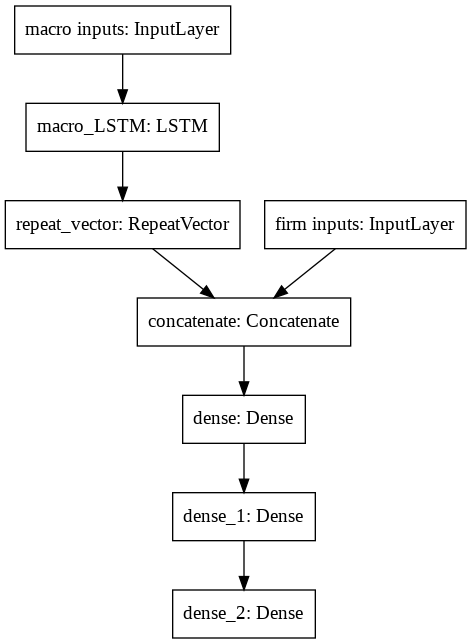

In [15]:
plot_model(sdf_model)

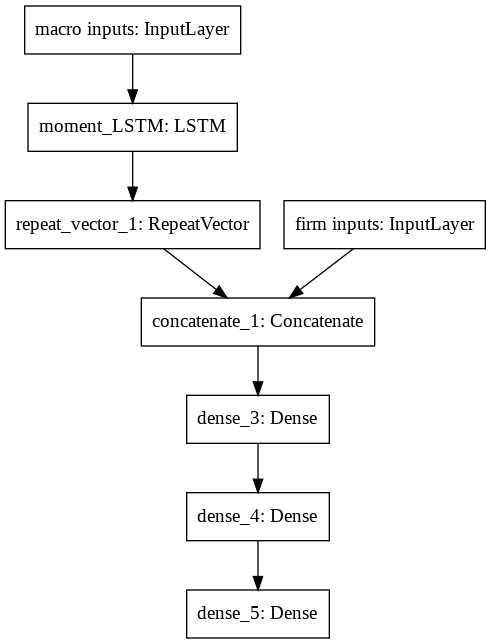

In [16]:
plot_model(moment_model)

In [16]:
# training

# phrase 1: train SDF model
# phrase 2: train moment model
# phrase 3: calculate loss value
# phrase 4: min max optimization